In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
iris_data = pd.read_excel('/content/iris (2).xls')

In [302]:
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [303]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [304]:
iris_data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [305]:
#checking null values
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [306]:
#There are null values in SL,SW and PL.

Missing Values Handling

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

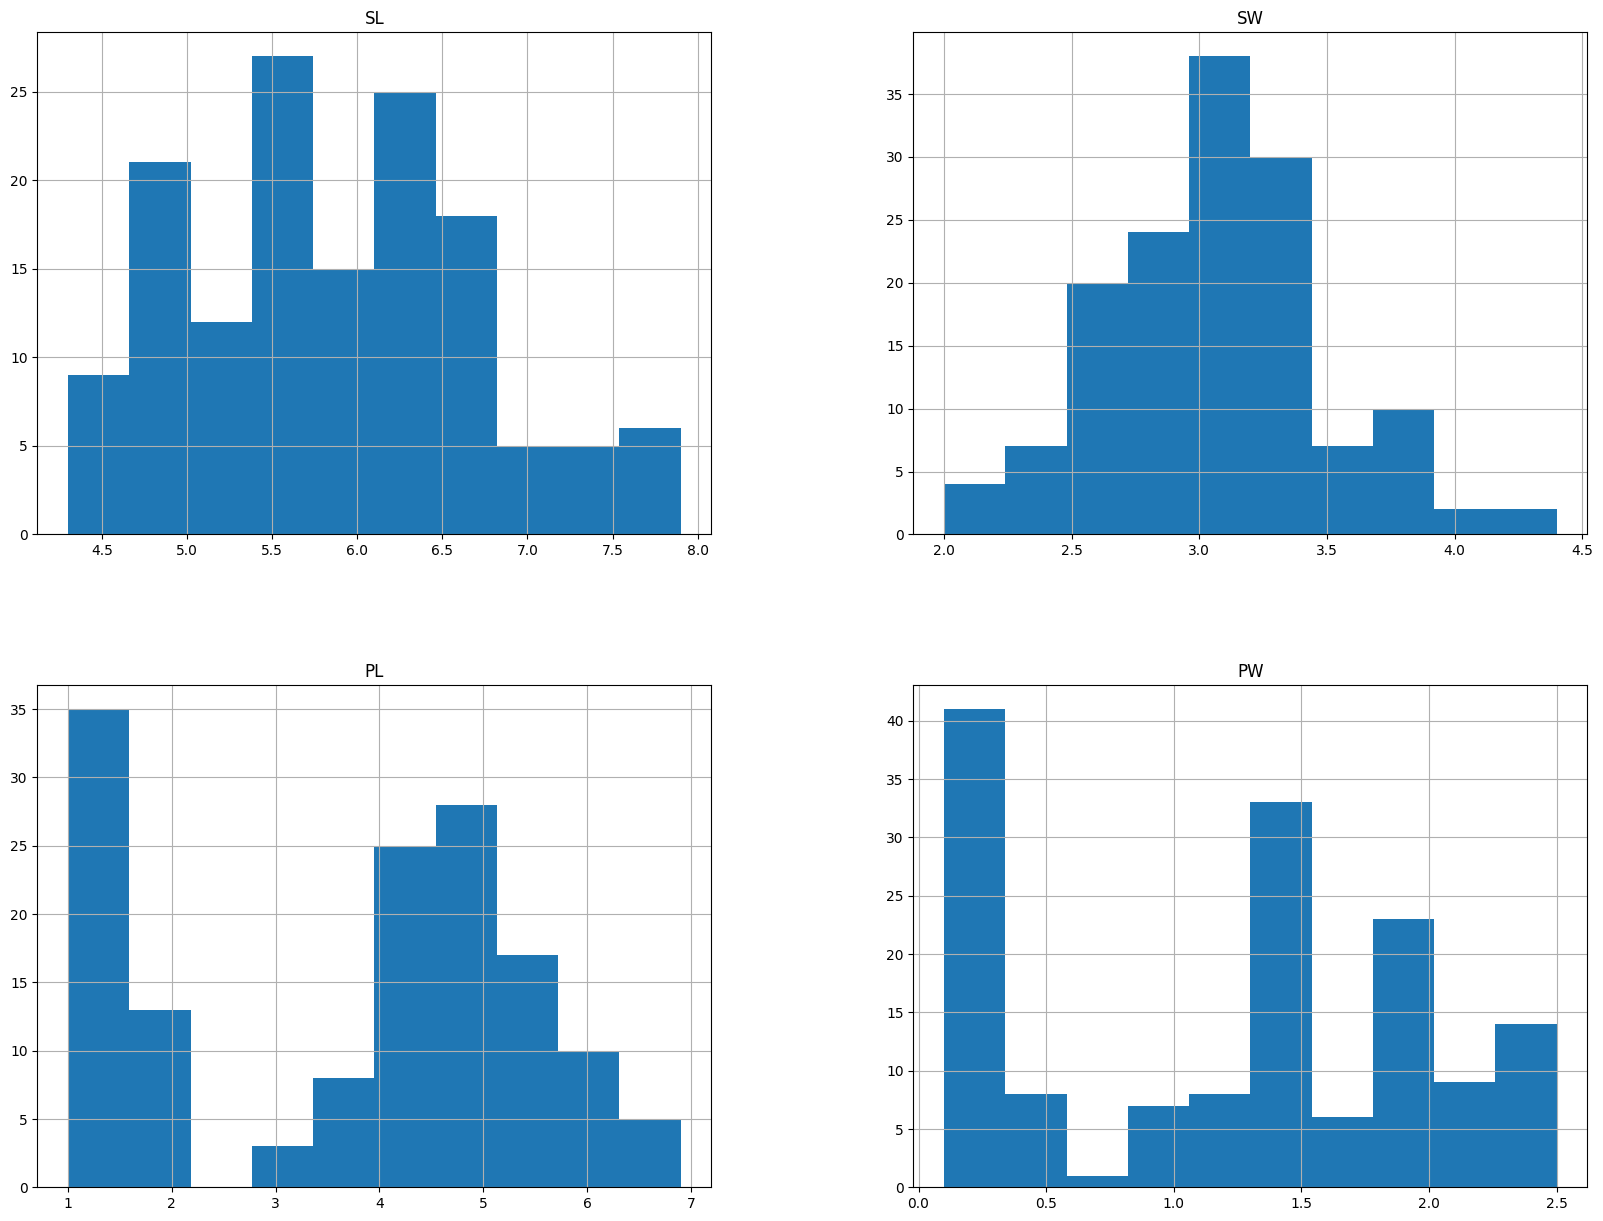

In [307]:
freqgraph = iris_data.select_dtypes(include = 'float64')
freqgraph.hist(figsize = (20,15))


In [308]:
#the distribution is skewed. so we use median to replace the null values
data1 = iris_data



In [309]:
data2 = data1.fillna(data1.median(numeric_only=True))

In [310]:
data2.isna().sum()
#Now all the missing values are handled

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Outlier Detection

In [311]:
#we take only number columns while outlier handling
num_columns = ['SL','SW','PL','PW']

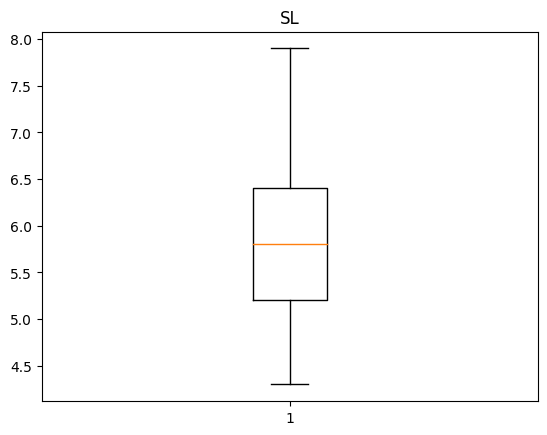

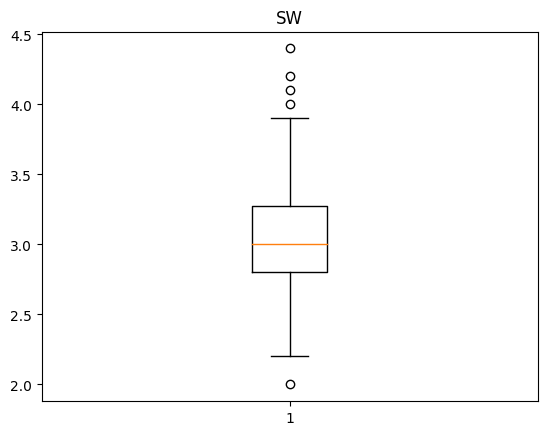

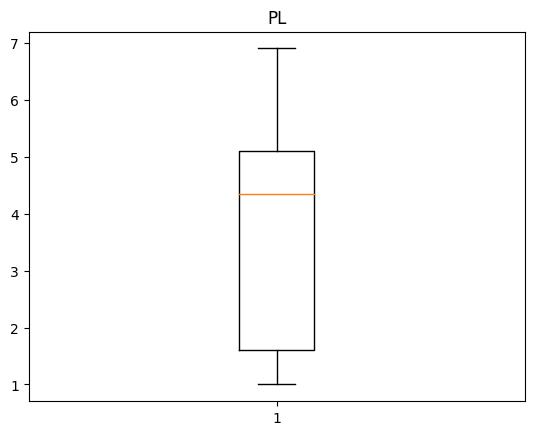

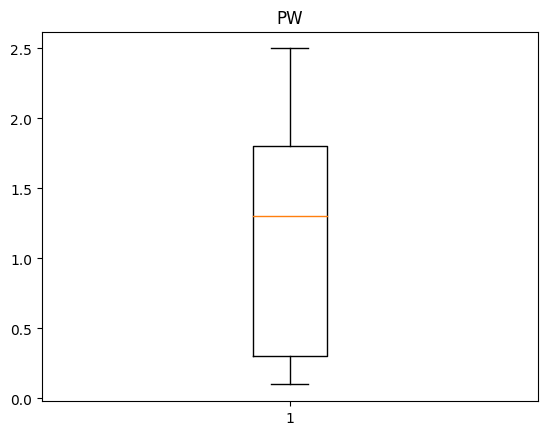

In [312]:
for i in num_columns:
  plt.figure()
  plt.boxplot(data2[i])
  plt.title(i);

In [313]:
#There are 5 outliers in column SW.We need to handle those outliers
#Using IQR to remove those outliers
Q1 = np.percentile(data2['SW'],25,method='midpoint')
Q2 = np.percentile(data2['SW'],50,method='midpoint')
Q3 = np.percentile(data2['SW'],75,method='midpoint')

In [314]:
print('Q1 is :',Q1)
print('Q2 is :',Q2)
print('Q3 is :',Q3)

Q1 is : 2.8
Q2 is : 3.0
Q3 is : 3.25


In [315]:
IQR = Q3 - Q1
print(IQR)

0.4500000000000002


In [316]:
low_lim = Q1 - 1.5*IQR
up_lim = Q3 +1.5*IQR

print("lower value: ",low_lim)
print("Upper value: ",up_lim)


lower value:  2.1249999999999996
Upper value:  3.9250000000000003


In [317]:
data3 = data2

In [318]:
outliers = []

for x in data3['SW']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)

print(outliers)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [319]:
data3['SW'] = data3['SW'].clip(lower = low_lim,upper = up_lim)

In [320]:
outliers = []

for x in data3['SW']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)

print(outliers)

[]


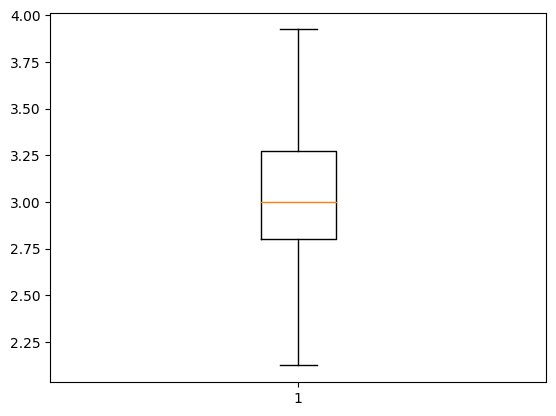

In [321]:
#outliers in Sw are handled
plt.boxplot(data3['SW'])
plt.show();

Encoding

In [322]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [323]:
data3.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [324]:
#checking for unique values in column Classification
data3['Classification'].nunique()

3

In [325]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data3['Classification'] = encoder.fit_transform(data3['Classification'])

In [326]:
data3.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [327]:
data3.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.100056,0.830554,0.800939,0.774077
SW,-0.100056,1.000000,-0.402621,-0.335121,-0.402577
PL,0.830554,-0.402621,1.000000,0.936089,0.927509
PW,0.800939,-0.335121,0.936089,1.000000,0.956464
Classification,0.774077,-0.402577,0.927509,0.956464,1.000000


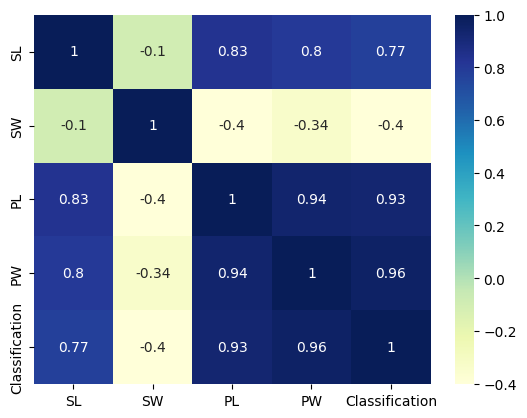

In [328]:
dataplot = sns.heatmap(data3.corr(),cmap="YlGnBu", annot=True)
plt.show()

Scaling and Normalization

In [329]:
#only taking  numerical dependent columns
data4 = data3
X = data4[['SL','SW','PL','PW']]

In [330]:
X.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.041500,3.780000,1.198667
std,0.808567,0.402924,1.729424,0.763161
min,4.300000,2.125000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,3.925000,6.900000,2.500000


Standard Scaling

In [331]:
from sklearn.preprocessing import StandardScaler

In [332]:
sc = StandardScaler()

In [333]:
X_sc = sc.fit_transform(X)

In [334]:
X_sc = pd.DataFrame(X_sc)

In [335]:
X_sc.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,150.000000,1.500000e+02
mean,-1.894781e-16,-2.605323e-16,0.000000,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350,1.003350e+00
min,-1.927530e+00,-2.282244e+00,-1.612857,-1.444450e+00
25%,-8.107207e-01,-6.013769e-01,-1.264758,-1.181504e+00
50%,-6.618128e-02,-1.033422e-01,0.330694,1.332259e-01
75%,6.783581e-01,5.814555e-01,0.765817,7.905908e-01
max,2.539707e+00,2.200068e+00,1.810113,1.710902e+00


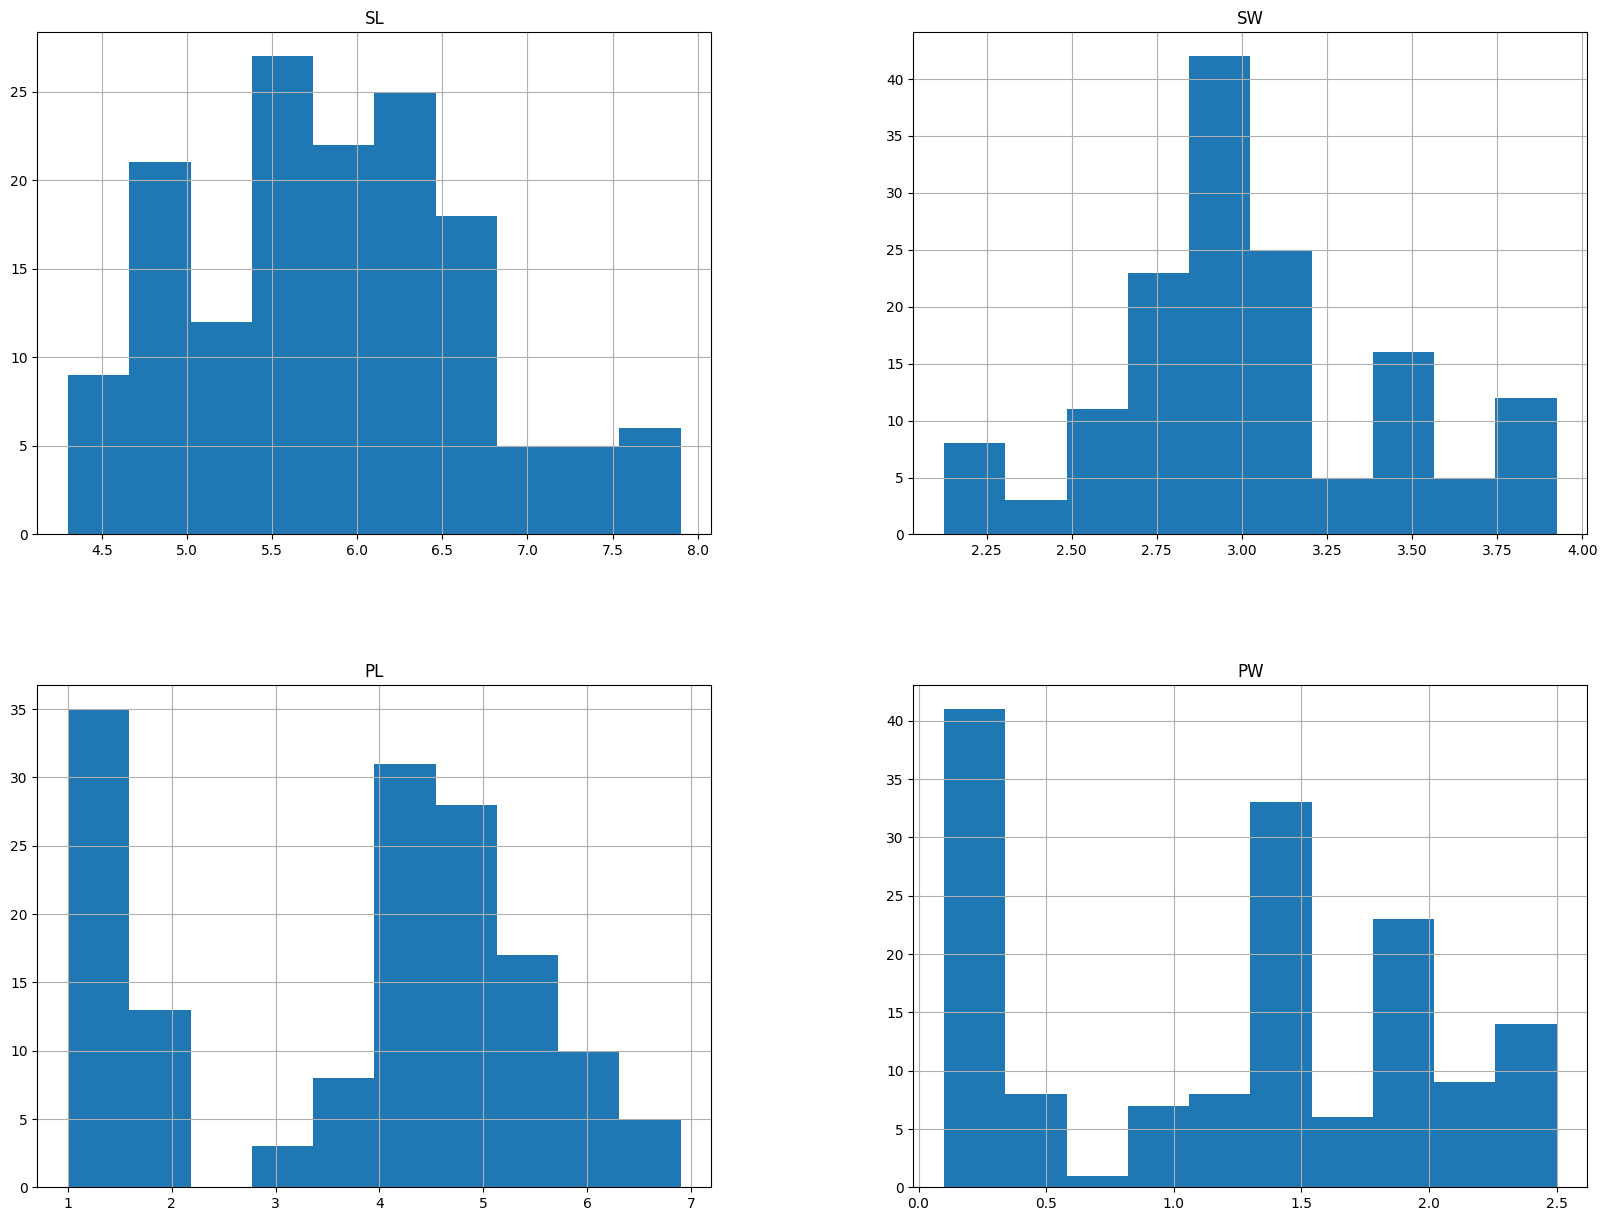

In [336]:
#now the data has been converted to mean=0 and sd = 1
X.hist(figsize=(20,15))
plt.show()

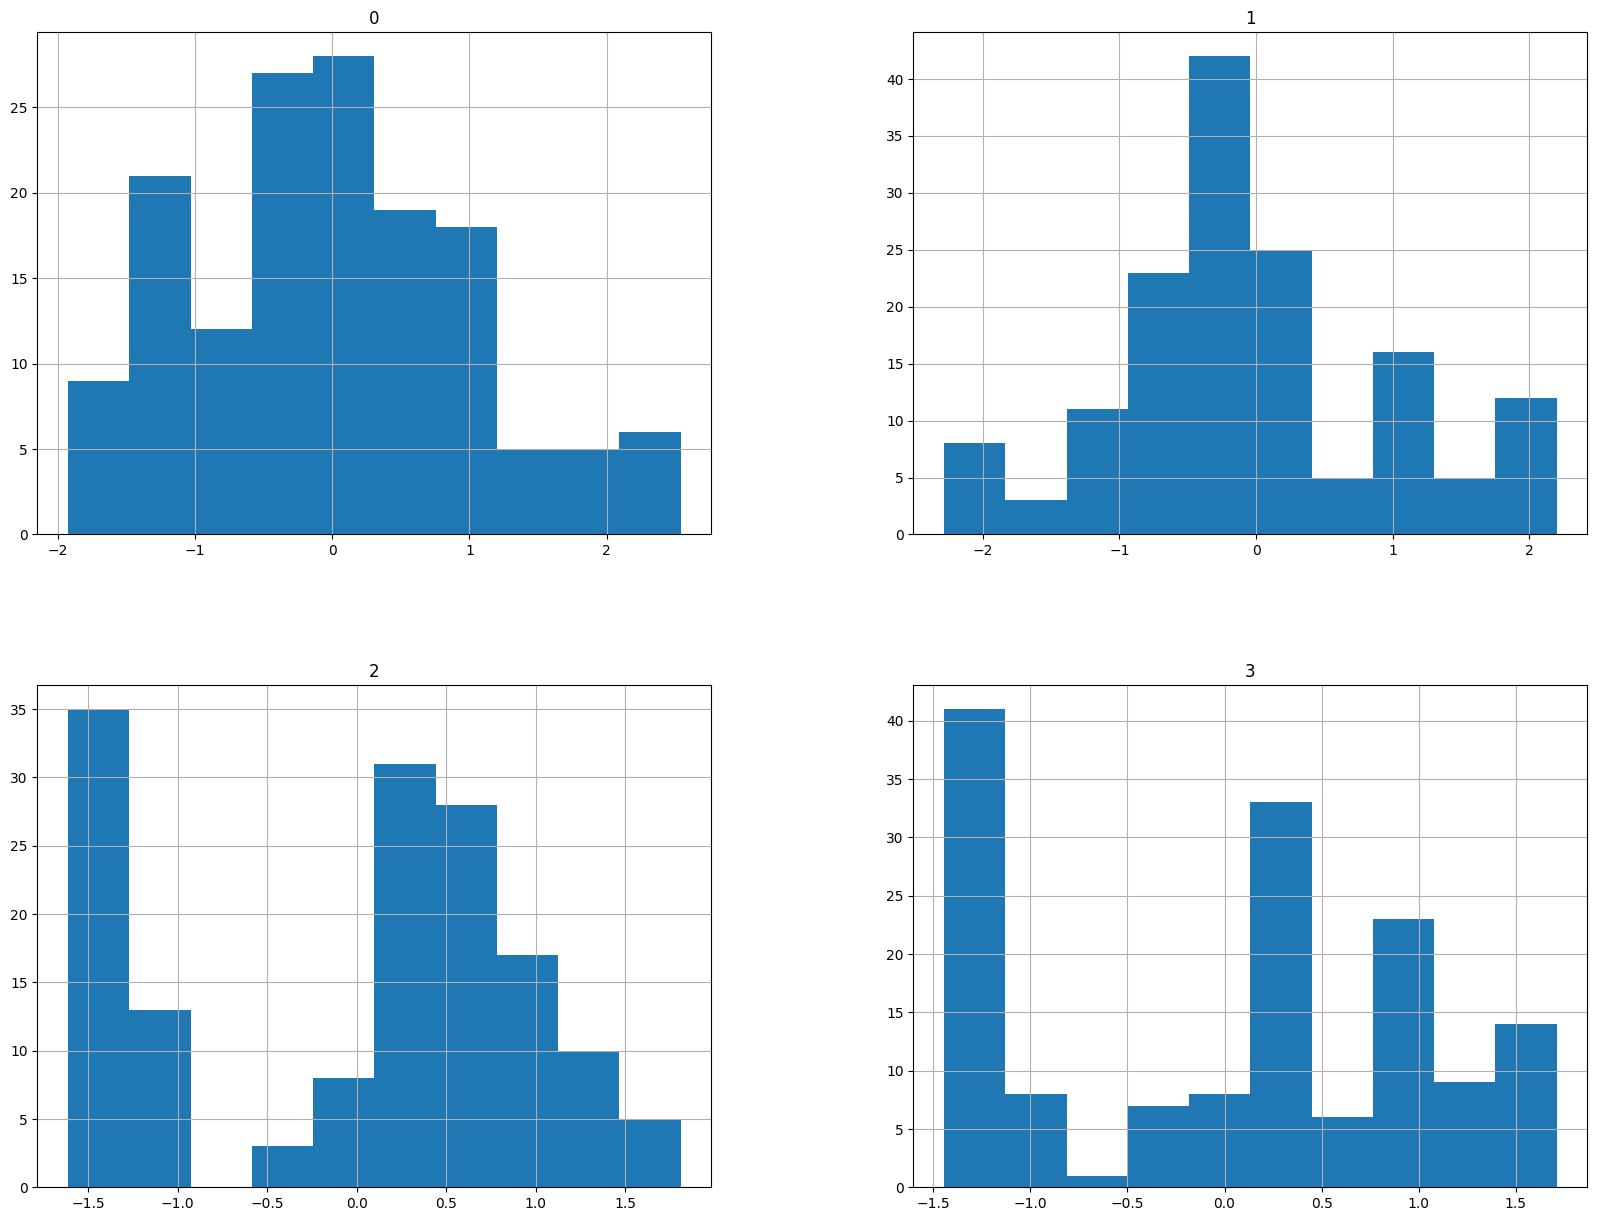

In [337]:
#After scaling
X_sc.hist(figsize=(20,15))
plt.show()

In [338]:
#Normalization
import sklearn
X_norm = sklearn.preprocessing.normalize(X)

In [339]:
X_norm = pd.DataFrame(X_norm)

In [340]:
X_norm.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,0.751930,0.401687,0.458492,0.141178
std,0.048017,0.099588,0.158021,0.078724
min,0.631396,0.238392,0.168646,0.014956
25%,0.714322,0.326071,0.256770,0.048734
50%,0.754652,0.354679,0.535751,0.163851
75%,0.793458,0.514570,0.580025,0.197532
max,0.860939,0.607125,0.636981,0.280419


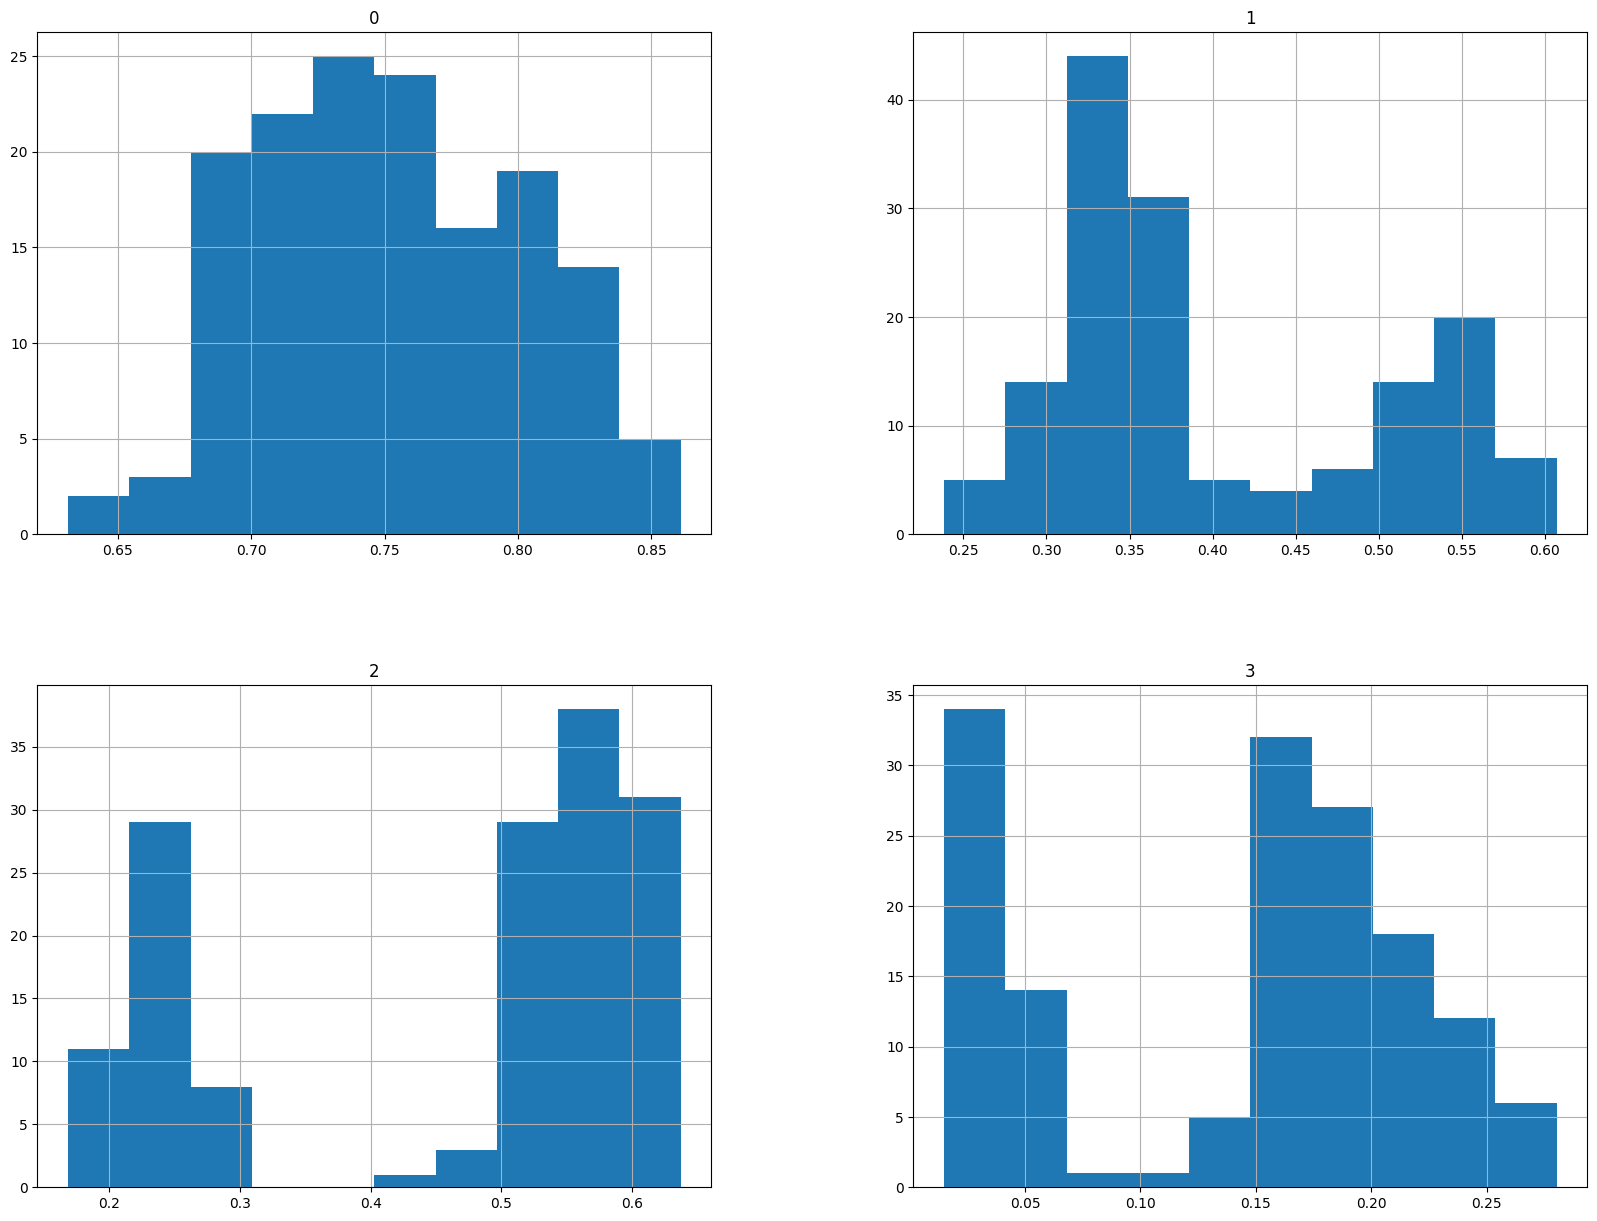

In [341]:
X_norm.hist(figsize=(20,15))
plt.show()

In [342]:
y = data3['Classification']
X = data3.drop('Classification',axis = 1)

In [343]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

SVM

In [344]:
from sklearn.svm import SVC
sv_clf = SVC(kernel='linear')
sv_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [345]:
y_pred=sv_clf.predict(X_test)

In [346]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy score is :',accuracy_score(y_test,y_pred))

Accuracy score is : 1.0


In [347]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Decision Tree

In [348]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)

In [349]:
print('Accuracy score is :',accuracy_score(y_test,y_pred))

Accuracy score is : 1.0


In [350]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Random Forest

In [351]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)

In [352]:
print('Accuracy score is :',accuracy_score(y_test,y_pred))

Accuracy score is : 1.0


In [353]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [354]:
# Hyperparameter tuning

rf_clf1 = RandomForestClassifier(n_estimators=20, max_depth=20, criterion='entropy', min_samples_split=3)
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)

In [355]:
print('Accuracy score is :',accuracy_score(y_test,y_pred))

Accuracy score is : 1.0


In [356]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [357]:
#linear model to regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [358]:
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [359]:
log_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [360]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [361]:
confusion_matrix(y_test,log_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [362]:
print('Accuracy:',accuracy_score(y_test,log_pred))
#print('Precision:',precision_score(y_test,log_pred))
#print('recall:',recall_score(y_test,log_pred))
#print('F1:',f1_score(y_test,log_pred))

Accuracy: 1.0


KNN

In [363]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [364]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  knn_pred=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'Metric K')

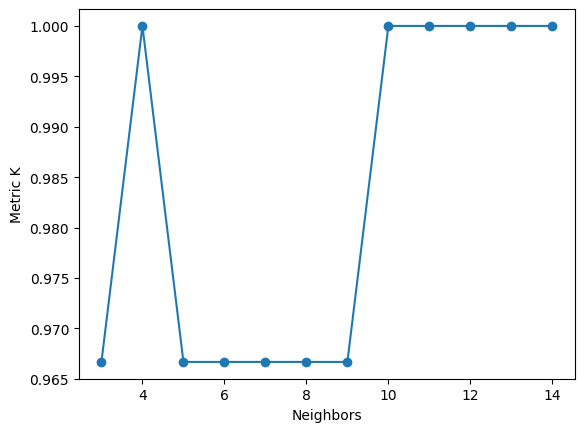

In [365]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Metric K')

In [366]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

In [367]:
confusion_matrix(y_test,knn_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [368]:
print('Accuracy:',accuracy_score(y_test,knn_pred))
#print('Precision:',precision_score(y_test,knn_pred))
#print('recall:',recall_score(y_test,knn_pred))
#print('F1:',f1_score(y_test,knn_pred))

Accuracy: 0.9666666666666667


In [369]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [370]:
Scaled_xtrain = scaler.fit_transform(X_train)
Scaled_xtest = scaler.fit_transform(X_test)

In [371]:
log_reg.fit(Scaled_xtrain,y_train)
log_pred=log_reg.predict(Scaled_xtest)

In [372]:
confusion_matrix(y_test,log_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [373]:
print('Accuracy:',accuracy_score(y_test,log_pred))
#print('Precision:',precision_score(y_test,log_pred))
#print('recall:',recall_score(y_test,log_pred))
#print('F1:',f1_score(y_test,log_pred))

Accuracy: 0.9666666666666667


In [374]:
#logistic regression with scaling is better.since better accuracy
classifier.fit(Scaled_xtrain,y_train)
knn_pred=classifier.predict(Scaled_xtest)
confusion_matrix(y_test,knn_pred)
print('Accuracy: ',accuracy_score(y_test,knn_pred))
#print('Precision: ',precision_score(y_test,knn_pred))
#print('recall: ',recall_score(y_test,knn_pred))
#print('f1: ',f1_score(y_test,knn_pred))

Accuracy:  0.9666666666666667


Accuracy of SVM, Decision Tree, Random Forest and KNN are 1. So these are the best models